<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/example_cluster.csv')
df

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


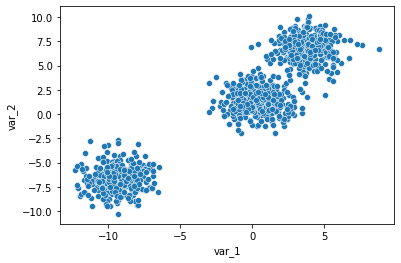

In [ ]:
# 산점도 
sns.scatterplot(x='var_1',y='var_2', data=df)
plt.show()

In [ ]:
# k 평균 군집화 K Means Clustering
from sklearn.cluster import KMeans

In [ ]:
# 클러스터 나눠줄 클러스터(묶음)의 수 
kmeans_model = KMeans(n_clusters=3, random_state=27)


In [ ]:
# 지도학습 X,y
# 비지도학습 X만 있으면 댐
kmeans_model.fit(df)

KMeans(n_clusters=3, random_state=27)

In [ ]:
# 예측
pred = kmeans_model.predict(df)
pred

In [ ]:
# label
df['label'] = pred # df의 라벨에 예측값을 넣어줌 (kmean으로 산출한 그룹)

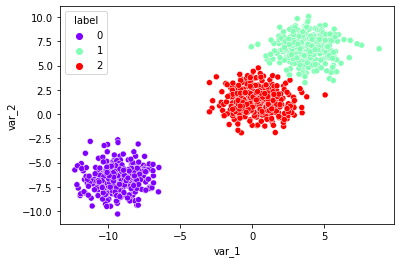

In [ ]:
# 산점도2 label을 적용한 
sns.scatterplot(
    x='var_1',y='var_2',data=df,hue='label',palette='rainbow'
)

In [ ]:
# 이너셔 inertia
# 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합 
kmeans_model.inertia_

3090.03323707666

In [ ]:
# k가 엄청 많을 경우 
kmeans_model2 = KMeans(n_clusters=500, random_state=27)
kmeans_model2.fit(df)
kmeans_model2.inertia_


6.1667156679841995

In [ ]:
df['label2'] = kmeans_model2.predict(df)

In [ ]:
df.label2

0      266
1      152
2      452
3       41
4      397
      ... 
995    339
996     96
997    140
998    187
999    162
Name: label2, Length: 1000, dtype: int32

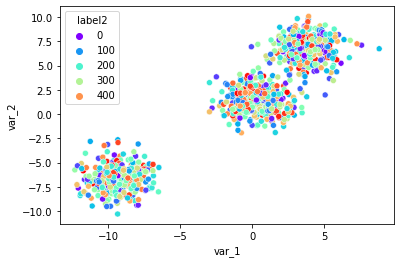

In [ ]:
sns.scatterplot(
    x='var_1',y='var_2',data=df,hue='label2',palette='rainbow'
)

In [ ]:
# 적절한 k값 설정 -> 엘보우 기법
df = df.drop(['label','label2'], axis=1)
df.columns

Index(['var_1', 'var_2'], dtype='object')

In [ ]:
# inertia 거리의 변화폭이 둔화되는 지점 -> 꺾이는 지점
distance = []
for k in range(2,10): # k는 2에서 9까지 반복
  k_model = KMeans(n_clusters=k)
  k_model.fit(df) # fit만 시켜도 inertia_ 생성 
  distance.append(k_model.inertia_)

In [ ]:
distance

[9741.810795093243,
 3090.03323707666,
 2716.1869820944694,
 2379.6539360739625,
 2062.988294471451,
 1820.0813899407106,
 1593.8908199321554,
 1371.8611944663357]

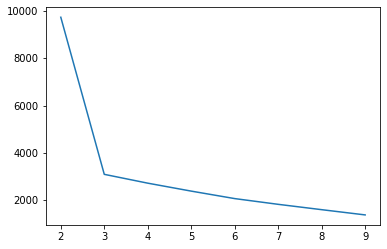

In [ ]:
# 선 챁
sns.lineplot(x=range(2,10), y=distance)

#3이 꺾이는 지점 엘보우 
# 엘보우 직관적이고 편리하긴하나 객관적인건 아님 사람이 판단해줘야함 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/customer.csv')
df

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96
...,...,...,...
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50


In [ ]:
df.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [ ]:
df.tail()

,cc_num,category,amt
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50
240453,213112402583773,shopping,25.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
df.describe(include='all')

,cc_num,category,amt
count,2.404540e+05,240454,240454.000000
unique,NaN,11,NaN
top,NaN,shopping,NaN
freq,NaN,40200,NaN
mean,3.365543e+17,NaN,69.758079
std,1.191447e+18,NaN,150.060270
min,6.049559e+10,NaN,1.000000
25%,2.131124e+14,NaN,9.740000
50%,2.720433e+15,NaN,47.530000
75%,4.642255e+15,NaN,82.950000


In [ ]:
# 크레딧카드 넘버 -> 카드번호 -> 특정고객
df.cc_num.nunique() # 고유값

100

In [ ]:
# category 별로 고객들이 얼마나 소비를 하냐 
customer = pd.get_dummies(df, columns=['category'])
customer.info()

#더미즈로 1,0으로 해서 속한건 1 안속한건 0으로 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   240454 non-null  int64  
 1   amt                      240454 non-null  float64
 2   category_entertainment   240454 non-null  uint8  
 3   category_food_dining     240454 non-null  uint8  
 4   category_gas_transport   240454 non-null  uint8  
 5   category_grocery         240454 non-null  uint8  
 6   category_health_fitness  240454 non-null  uint8  
 7   category_home            240454 non-null  uint8  
 8   category_kids_pets       240454 non-null  uint8  
 9   category_misc            240454 non-null  uint8  
 10  category_personal_care   240454 non-null  uint8  
 11  category_shopping        240454 non-null  uint8  
 12  category_travel          240454 non-null  uint8  
dtypes: float64(1), int64(1), uint8(11)
memory usage: 6.2 MB


In [ ]:
# 정수 인덱스로 행 열을 가져 오겠다 
# 전체행 중에 2번째 이후 (경계 포함)열들만 표시하겠다 
customer.iloc[:,2:]

,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
240449,0,0,0,0,0,0,0,0,0,1,0
240450,0,0,0,0,0,0,0,0,0,1,0
240451,0,0,0,0,1,0,0,0,0,0,0
240452,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 특정 카테고리 포함 여부 (1, 0)
for col_name in customer.iloc[:,2:].columns: # 범주들 이름으로 for문 
# 트랜잭션, 거래, 행 (데이터에서의 행)
    # print(col_name)
    # 기존에 있는 컬럼(열)에 새로운 값을 연산
    customer[col_name] = customer[col_name] * customer['amt']
    # 특정 범주(카테고리 포함 여부) : customer[col_name]
    # 소비액 : customer['amt']
    # -> 특정 카테고리에 대한 소비액 
    # 한 행 -> 거래-> 열 -> 거래가 속한 범주의 열이라면 amt랑 곱해진 소비액 나올 거고
    # 나머지 소속되지 않은 경우엔 0만 있을 것

In [ ]:
customer

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [ ]:
# cc_num 별로 합계를 해주겠다
# 카드번호별로 groupby 한다음에 합계를 구하면은..?
customer_agg = customer.groupby('cc_num').sum()
customer_agg
# cc_num 별 총 소비액인 amt
# 각기 category별 cc_num의 소비액인 각자 열
# 총 소비 또는 범주별 소비를 통해서 분류 군집화가 가능해짐 

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,250072.42,13951.22,9175.56,36490.48,47944.34,12227.52,20009.92,21961.88,31078.34,16686.28,37421.16,3125.72
4599735407877245080,96104.05,6065.69,10049.34,11201.13,16248.52,3013.14,9423.36,10710.95,8514.05,6823.09,12336.91,1717.87
4666314527820883145,73275.54,4612.23,3079.99,1593.63,13434.30,3894.14,6387.17,3114.63,4199.44,3584.61,18135.65,11239.75


In [ ]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 60495593109 to 4956828990005111019
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB


In [ ]:
# standard scaler 표준화 스케일러 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# 스케일링 하고 나서 데이터
scaled = scaler.fit_transform(customer_agg)
scaled # numpy array

array([[-1.40232671, -1.13561684, -0.97106905, ..., -1.07025953,
        -1.14142374, -0.61993021],
       [ 1.07940687,  0.41407488,  0.16887956, ...,  1.80734981,
         0.65996745, -0.22258695],
       [ 1.20015148,  0.74712739,  1.62296823, ...,  0.12782479,
         1.29993842,  2.7668909 ],
       ...,
       [-1.10768846, -0.9265974 , -1.1902022 , ..., -0.97473624,
        -0.66458252,  0.19333459],
       [-0.94081475, -0.80789527, -1.09326659, ..., -0.89572163,
        -0.70809415,  0.95453742],
       [ 0.59998262,  0.97669101,  0.61115793, ..., -0.39803373,
        -0.02063061, -0.08679376]])

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=customer_agg.columns, index=customer_agg.index)

In [ ]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


In [ ]:
# 엘보우 기법
distance = []
for k in range(2,10): # 끝 경계 포함 x
  k_model = KMeans(n_clusters=k,random_state=12)
  k_model.fit(scaled_df)
  distance.append(k_model.inertia_)

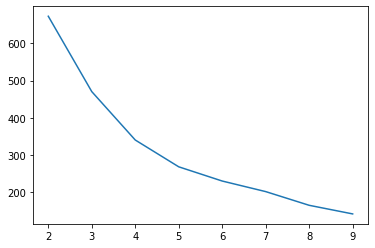

In [ ]:
sns.lineplot(x=range(2,10), y=distance)

In [ ]:
# 실루엣 계수
# inertia 그룹(클러스터)의 중심으로부터 다른 요소들간의 거리
# 실루엣 계수 : 클러스터 내부의 평균 거리 + 최근접한 다른 클러스터 와의 평균 거리 
from sklearn.metrics import silhouette_score

In [ ]:
silhoette = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k, random_state=12)
    # k_model.fit(scaled_df)
    # k_model.inertia_
    labels = k_model.fit_predict(scaled_df)
    # 실제의 데이터 값과, 분류된 라벨을 통해서 클러스터 내부 및 클러스터 간 거리를 계산
    silhoette.append(silhouette_score(scaled_df, labels))

In [ ]:
silhoette

[0.3712947437253903,
 0.37507693866618963,
 0.4345029210702488,
 0.3930850775191427,
 0.3837906854316547,
 0.40349881202864785,
 0.365961430759218,
 0.3982540544911355]

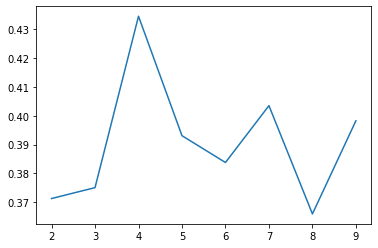

In [ ]:
# 실루엣 계쑤는 더 클수록 좋은 분류를 하고 있느 ㄴ것

sns.lineplot(x=range(2,10),y=silhoette)

In [ ]:
k_model = KMeans(n_clusters=4, random_state=12)
labels = k_model.fit_predict(scaled_df)

In [ ]:
scaled_df['label'] = labels

In [ ]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,1
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,2
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,1
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0


In [ ]:
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_mean
# 라벨 0이 빈곤층 1이 서민층 3이 부자
# 빈곤층이 여행에 돈을 많이 씀
# 라벨1은 가스트랜스포트(유류비?교통비?)를 많이 쓰니까 직장인?


,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740


In [ ]:
scaled_df_count = scaled_df.groupby('label').count().amt
scaled_df_count


label
0    45
1    37
2     8
3    10
Name: amt, dtype: int64

In [ ]:
scaled_df_count = scaled_df_count.rename('count')

In [ ]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
